In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product
from statannot import add_stat_annotation

In [ ]:
df_1k

In [1]:
from FADS.utils import mkoutdir

mkoutdir("n600", d=[1000, 3000, 10000], h2s=[0.3, 0.5, 0.7], sim=range(1, 51))

In [2]:
df_1k = pd.read_csv("results_1000.csv", names=["h2s", "i", "k", "method", "n_causals", "svm", "lr"])
df_3k = pd.read_csv("results_3000.csv", names=["h2s", "i", "k", "method", "n_causals", "svm", "lr"])
df_10k = pd.read_csv("results_10000.csv", names=["h2s", "i", "k", "method", "n_causals", "svm", "lr"])

dfs = [df_1k, df_3k, df_10k]

In [20]:
df_1k["d"] = 1000
df_3k["d"] = 3000
df_10k["d"] = 10000

dfs = [df_1k, df_3k, df_10k]

df = pd.concat(dfs).query("method in ['p']")
df

,h2s,i,k,method,n_causals,svm,lr,d
1.0,0.3,10,5,p,0,0.487750,0.587159,1000
1.0,0.3,10,25,p,1,0.558153,0.622360,1000
1.0,0.3,10,100,p,3,0.684877,0.721205,1000
1.0,0.3,10,300,p,5,0.695860,0.771332,1000
1.0,0.3,11,5,p,0,0.470343,0.527151,1000
...,...,...,...,...,...,...,...,...
1048.0,0.7,8,300,p,6,0.790039,0.863560,10000
1055.0,0.7,9,5,p,2,0.467215,0.749023,10000
1056.0,0.7,9,25,p,3,0.549107,0.757673,10000
1057.0,0.7,9,100,p,5,0.488002,0.802734,10000


In [25]:
12*25

300

Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox


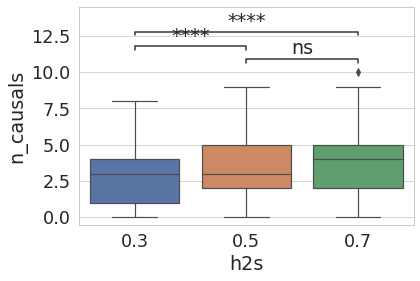

In [24]:
sns.boxplot(x=df["h2s"], y=df["n_causals"])
ax = plt.gca()
test_results = add_stat_annotation(
        ax, x=df["h2s"], y=df["n_causals"],
        box_pairs=[
            (0.3, 0.7),
            (0.5, 0.7),
            (0.3, 0.5)
        ],
        test='Wilcoxon', text_format='star',
        loc='inside', verbose=0)

plt.savefig("h2s.jpeg")

In [3]:
sns.set_theme(
    context = 'paper',
    style = 'whitegrid',
    font_scale = 2
)

In [4]:
delta_df = []

for d, df in zip([1000, 3000, 10000], dfs):
    df = df.query("method in ['ln', 'p']")
    pivoted = df.pivot(index=["k", "i", "h2s"], columns=["method"], values=["n_causals", "lr", "svm"])
    for criterion in ["n_causals", "lr", "svm"]:
        pivoted[criterion, "delta"] = pivoted[criterion]["ln"] - pivoted[criterion]["p"] 
        pivoted["d"] = d
    
    delta_df.append(pivoted)
    
final_delta = pd.concat(delta_df).reset_index()
final_delta.sort_index(axis=1)

d  h2s   i    k        lr                     n_causals            \
method                          delta        ln         p     delta   ln    p   
0        1000  0.3   1    5 -0.063776  0.680559  0.744336       1.0  2.0  1.0   
1        1000  0.5   1    5  0.177556  0.860180  0.682625       0.0  1.0  1.0   
2        1000  0.7   1    5  0.211780  0.907692  0.695912       2.0  3.0  1.0   
3        1000  0.3   2    5  0.019080  0.736672  0.717593       0.0  1.0  1.0   
4        1000  0.5   2    5 -0.001528  0.832731  0.834260       1.0  3.0  2.0   
..        ...  ...  ..  ...       ...       ...       ...       ...  ...  ...   
895     10000  0.5  24  300 -0.032814  0.674917  0.707731       1.0  5.0  4.0   
896     10000  0.7  24  300  0.009190  0.775550  0.766360       2.0  8.0  6.0   
897     10000  0.3  25  300  0.020300  0.708565  0.688265       0.0  4.0  4.0   
898     10000  0.5  25  300 -0.056111  0.647222  0.703333       0.0  5.0  5.0   
899     10000  0.7  25  300  0.019188  0.865128  0.845940       1.0  8.0  7.0   

             svm                      
method     delta        ln         p  
0      -0.095944  0.490070  0.586014  
1       0.255280  0.580259  0.324979  
2       0.077478  0.433846  0.356368  
3      -0.059764  0.468434  0.528199  
4       0.050986  0.542929  0.491942  
..           ...       ...       ...  
895     0.014461  0.661568  0.647108  
896     0.214425  0.725425  0.511000  
897     0.154894  0.695495  0.540601  
898     0.108611  0.644167  0.535556  
899     0.300195  0.806730  0.506535  

[900 rows x 13 columns]

## Causals

Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Text(0.5, 0.98, '1k')

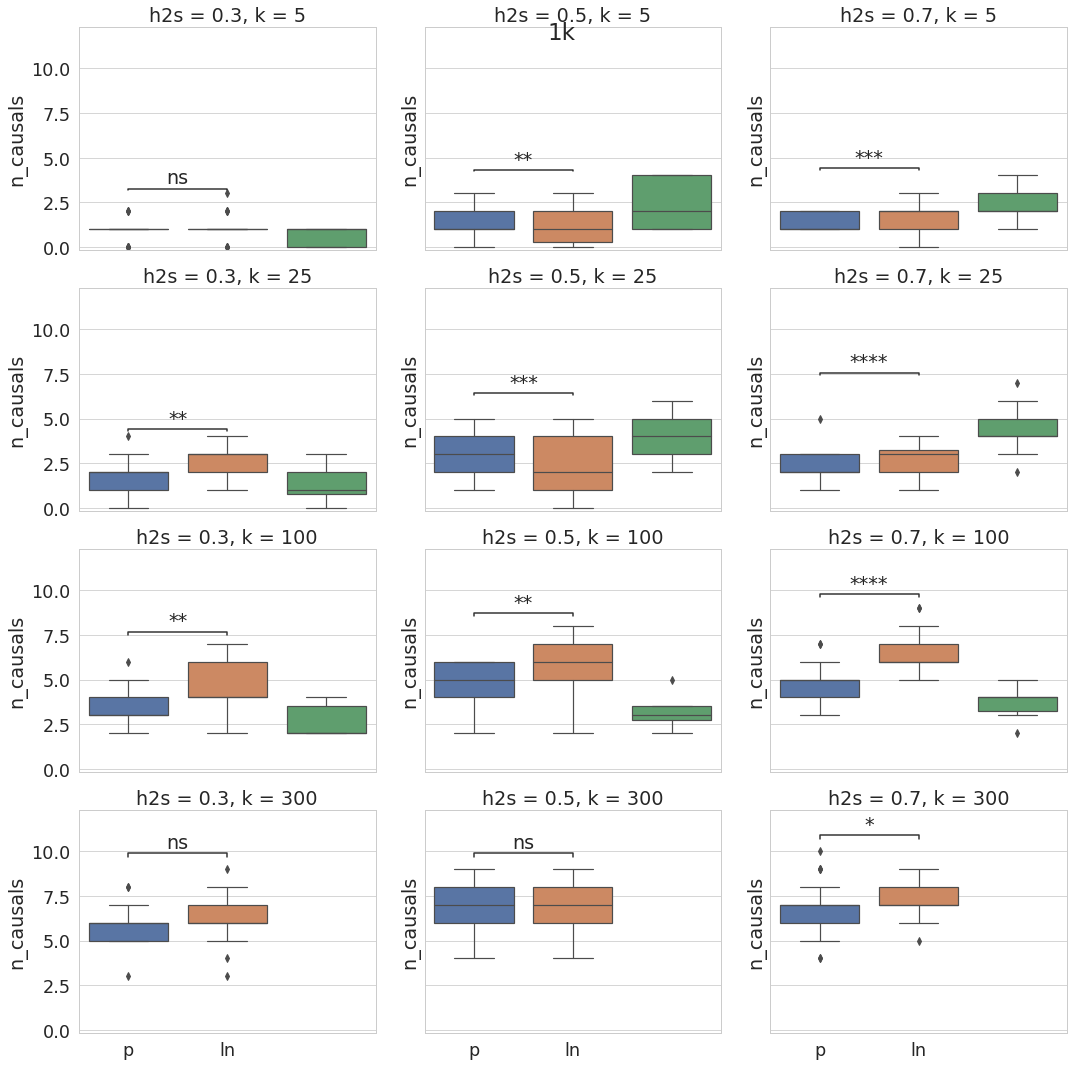

In [5]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15), squeeze=False, sharex=True, sharey=True)
plt.tight_layout()

dff = df_1k.query("method != 'ae'")
plt.tight_layout()
for (k, h2s), ax in zip(product([5, 25, 100, 300], [0.3, 0.5, 0.7]), axes.ravel()):
    plt.sca(ax)
    
    dfff = dff.query(f"k == {k} and h2s == {h2s}")
    
    sns.boxplot(x=dfff["method"], y=dfff["n_causals"])
    plt.xlabel("")
    
    test_results = add_stat_annotation(
        ax, x=dfff["method"], y=dfff["n_causals"], 
        order=["p", "ln", "hsic"],
        box_pairs=[
            ("ln", "p")
        ],
        test='Wilcoxon', text_format='star',
        loc='inside', verbose=0)
    plt.title(f"h2s = {h2s}, k = {k}")

fig.suptitle("1k")

Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Text(0.5, 0.98, '3k')

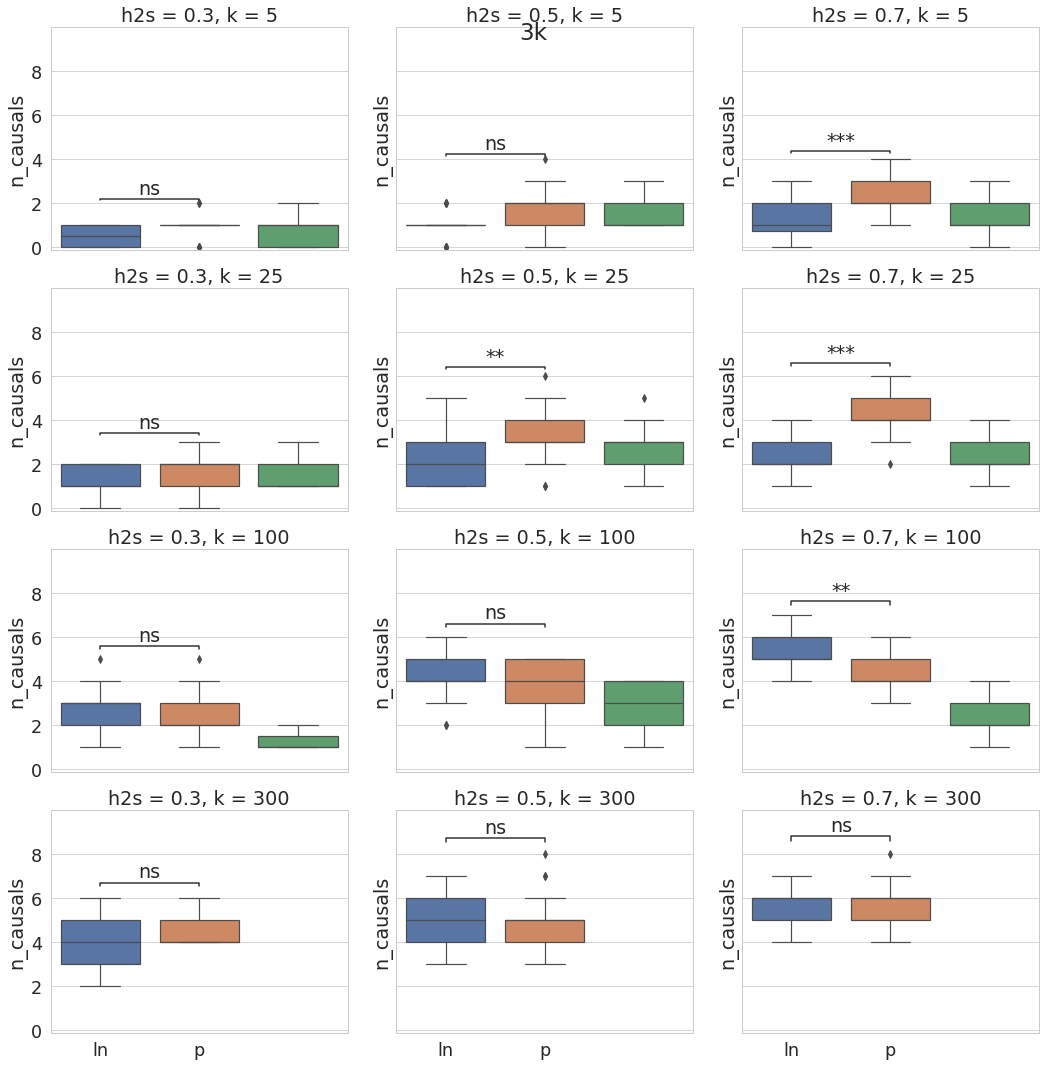

In [6]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15), squeeze=False, sharex=True, sharey=True)
plt.tight_layout()

dff = df_3k.query("method != 'ae'")
plt.tight_layout()
for (k, h2s), ax in zip(product([5, 25, 100, 300], [0.3, 0.5, 0.7]), axes.ravel()):
    plt.sca(ax)
    
    dfff = dff.query(f"k == {k} and h2s == {h2s}")
    
    sns.boxplot(x=dfff["method"], y=dfff["n_causals"])
    plt.xlabel("")
    
    test_results = add_stat_annotation(
        ax, x=dfff["method"], y=dfff["n_causals"], 
        order=["p", "ln", "hsic"],
        box_pairs=[
            ("ln", "p")
        ],
        test='Wilcoxon', text_format='star',
        loc='inside', verbose=0)
    plt.title(f"h2s = {h2s}, k = {k}")

plt.suptitle("3k")

Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Text(0.5, 0.98, '10k')

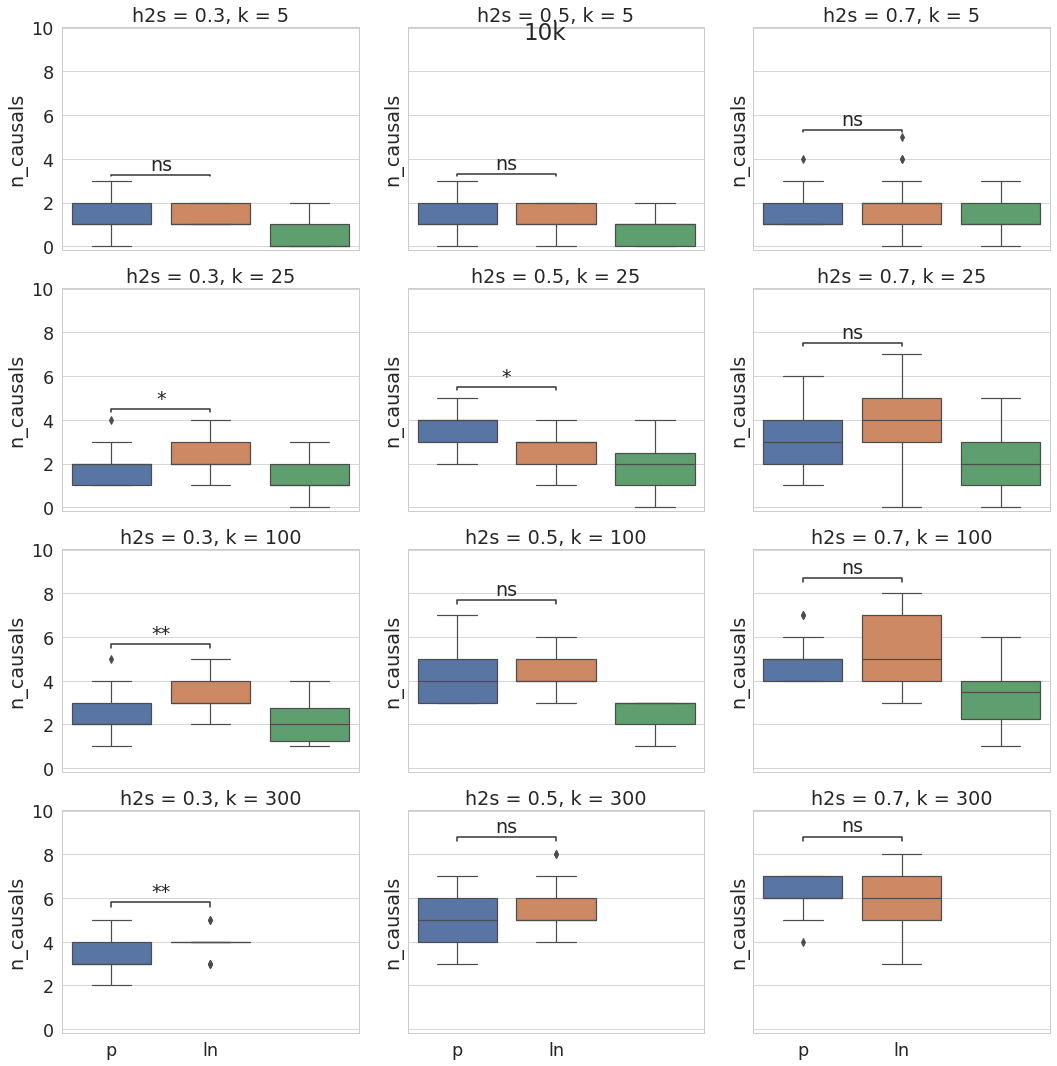

In [7]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15), squeeze=False, sharex=True, sharey=True)
plt.tight_layout()

dff = df_10k.query("method != 'ae'")
plt.tight_layout()
for (k, h2s), ax in zip(product([5, 25, 100, 300], [0.3, 0.5, 0.7]), axes.ravel()):
    plt.sca(ax)
    
    dfff = dff.query(f"k == {k} and h2s == {h2s}")
    
    sns.boxplot(x=dfff["method"], y=dfff["n_causals"])
    plt.xlabel("")
    
    test_results = add_stat_annotation(
        ax, x=dfff["method"], y=dfff["n_causals"], 
        order=["p", "ln", "hsic"],
        box_pairs=[
            ("ln", "p")
        ],
        test='Wilcoxon', text_format='star',
        loc='inside', verbose=0)
    plt.title(f"h2s = {h2s}, k = {k}")

plt.suptitle("10k")

/home/shussain/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/shussain/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/shussain/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/shussain/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/shussain/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/shussain/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/shussain/miniconda3/lib/python3.7/site-package

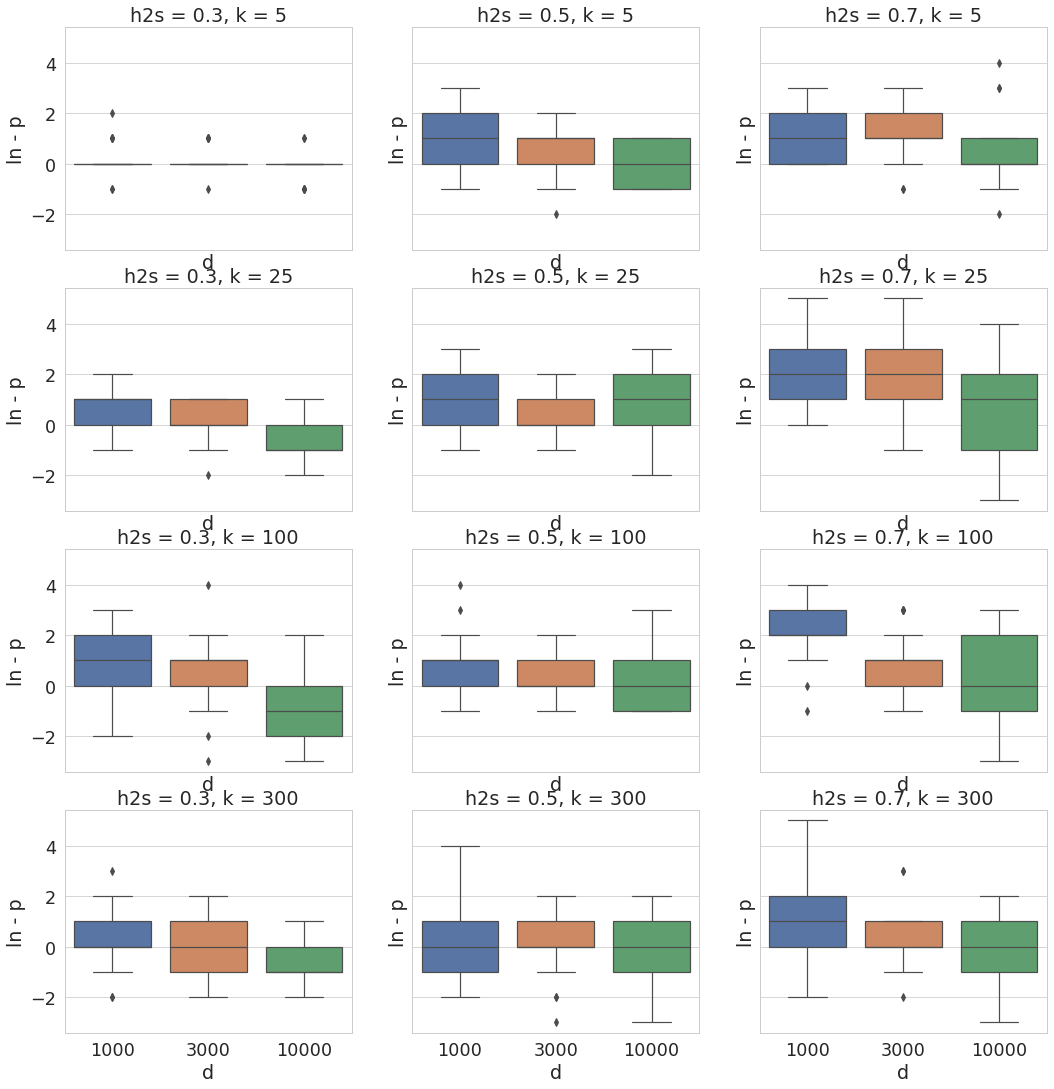

In [8]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15), squeeze=False, sharex=True, sharey=True)
plt.tight_layout()

for (k, h2s), ax in zip(product([5, 25, 100, 300], [0.3, 0.5, 0.7]), axes.ravel()):
    plt.sca(ax)
    dff = final_delta[final_delta["h2s"] == h2s][final_delta["k"] == k]
    sns.boxplot(y=dff["n_causals", "delta"], x=dff["d"])
    plt.ylabel("ln - p")
    ax.set_title(f"h2s = {h2s}, k = {k}")

## LR AUC

Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox


Text(0.5, 0.98, '1k')

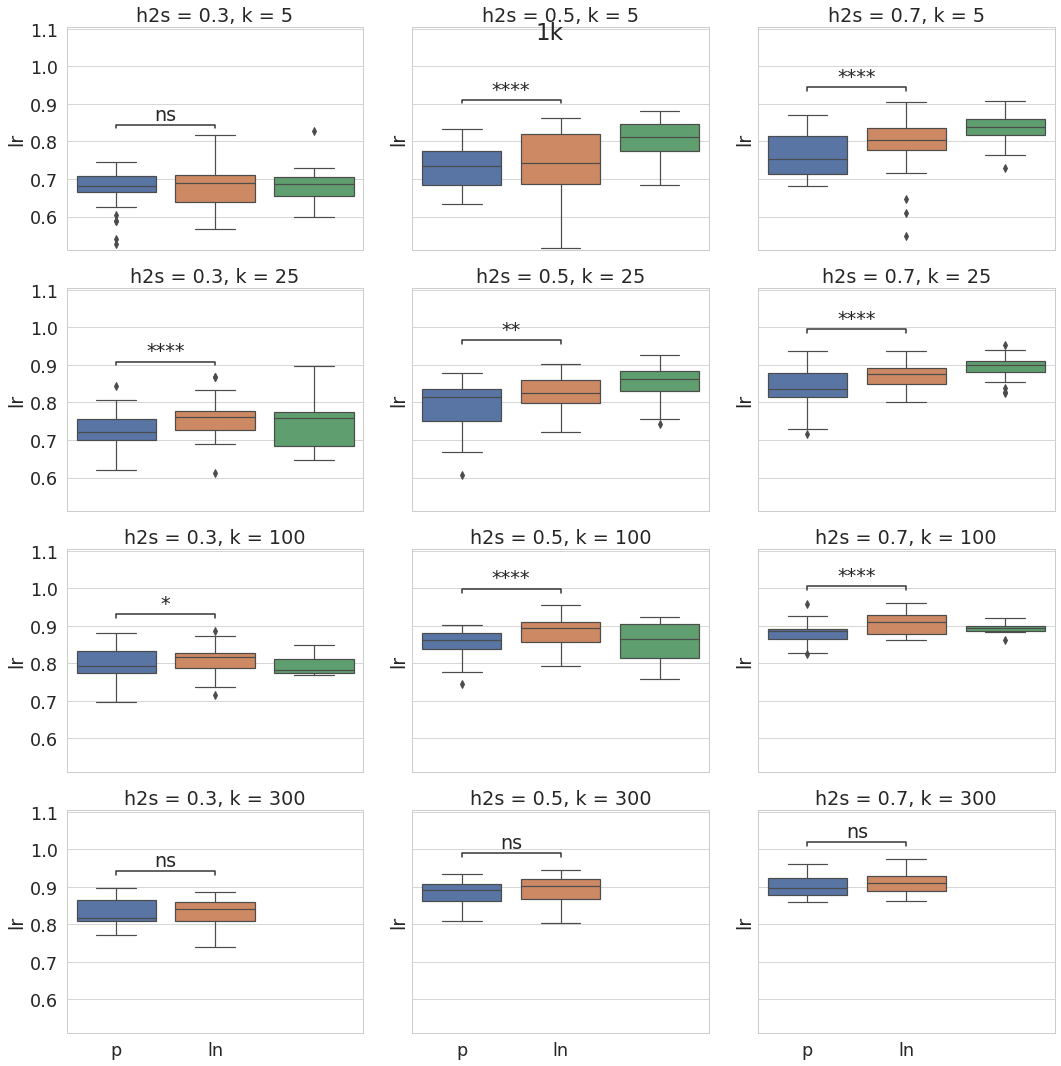

In [9]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15), squeeze=False, sharex=True, sharey=True)
plt.tight_layout()

dff = df_1k.query("method != 'ae'")
plt.tight_layout()
for (k, h2s), ax in zip(product([5, 25, 100, 300], [0.3, 0.5, 0.7]), axes.ravel()):
    plt.sca(ax)
    
    dfff = dff.query(f"k == {k} and h2s == {h2s}")
    
    sns.boxplot(x=dfff["method"], y=dfff["lr"])
    plt.xlabel("")
    
    test_results = add_stat_annotation(
        ax, x=dfff["method"], y=dfff["lr"], 
        order=["p", "ln", "hsic"],
        box_pairs=[
            ("ln", "p")
        ],
        test='Wilcoxon', text_format='star',
        loc='inside', verbose=0)
    plt.title(f"h2s = {h2s}, k = {k}")

plt.suptitle("1k")

Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox


Text(0.5, 0.98, '3k')

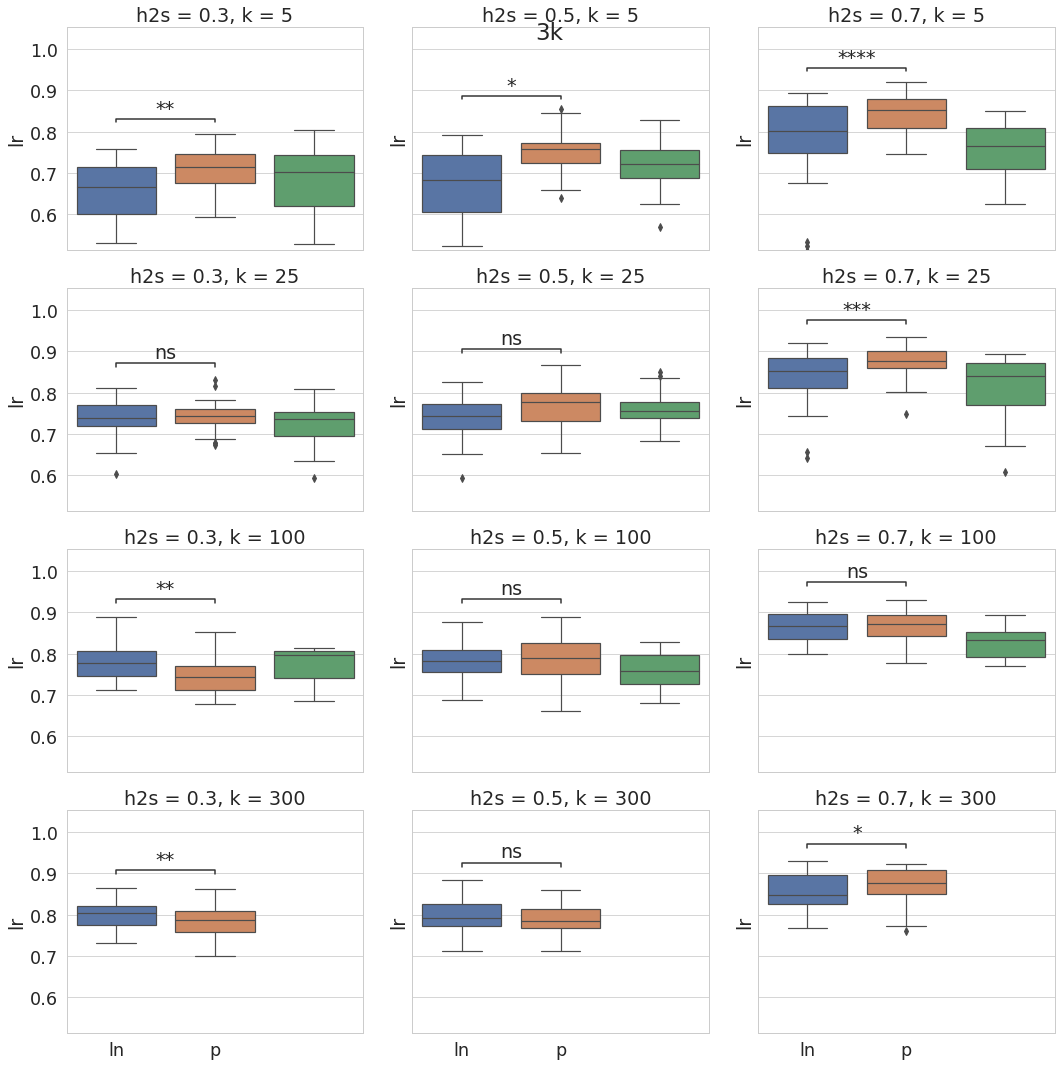

In [10]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15), squeeze=False, sharex=True, sharey=True)
plt.tight_layout()

dff = df_3k.query("method != 'ae'")
plt.tight_layout()
for (k, h2s), ax in zip(product([5, 25, 100, 300], [0.3, 0.5, 0.7]), axes.ravel()):
    plt.sca(ax)
    
    dfff = dff.query(f"k == {k} and h2s == {h2s}")
    
    sns.boxplot(x=dfff["method"], y=dfff["lr"])
    plt.xlabel("")
    
    test_results = add_stat_annotation(
        ax, x=dfff["method"], y=dfff["lr"], 
        order=["p", "ln", "hsic"],
        box_pairs=[
            ("ln", "p")
        ],
        test='Wilcoxon', text_format='star',
        loc='inside', verbose=0)
    plt.title(f"h2s = {h2s}, k = {k}")

plt.suptitle("3k")

Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox
Using zero_method  wilcox


Text(0.5, 0.98, '10k')

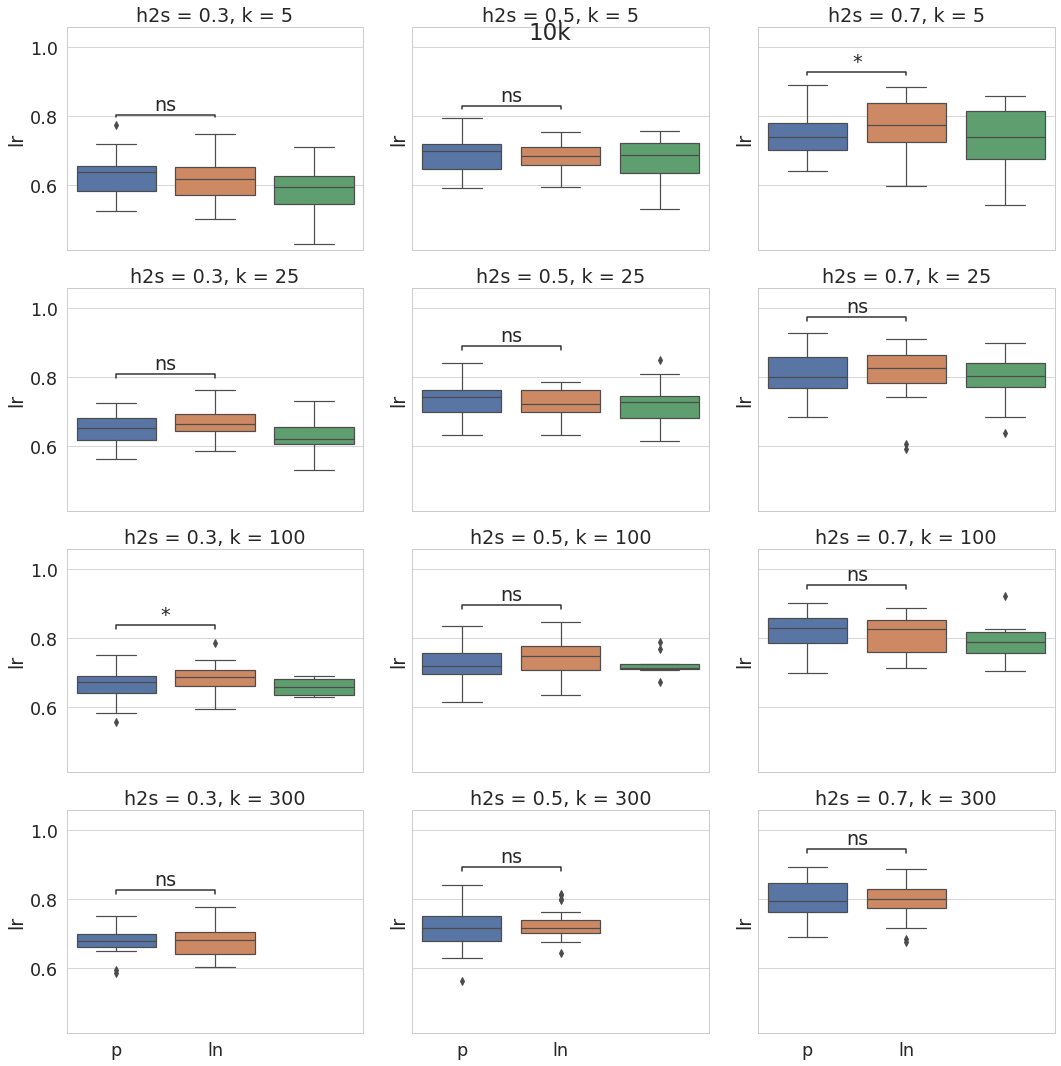

In [11]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15), squeeze=False, sharex=True, sharey=True)
plt.tight_layout()

dff = df_10k.query("method != 'ae'")
plt.tight_layout()
for (k, h2s), ax in zip(product([5, 25, 100, 300], [0.3, 0.5, 0.7]), axes.ravel()):
    plt.sca(ax)
    
    dfff = dff.query(f"k == {k} and h2s == {h2s}")
    
    sns.boxplot(x=dfff["method"], y=dfff["lr"])
    plt.xlabel("")
    
    test_results = add_stat_annotation(
        ax, x=dfff["method"], y=dfff["lr"], 
        order=["p", "ln", "hsic"],
        box_pairs=[
            ("ln", "p")
        ],
        test='Wilcoxon', text_format='star',
        loc='inside', verbose=0)
    plt.title(f"h2s = {h2s}, k = {k}")

plt.suptitle("10k")

/home/shussain/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/shussain/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/shussain/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/shussain/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/shussain/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/shussain/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/shussain/miniconda3/lib/python3.7/site-package

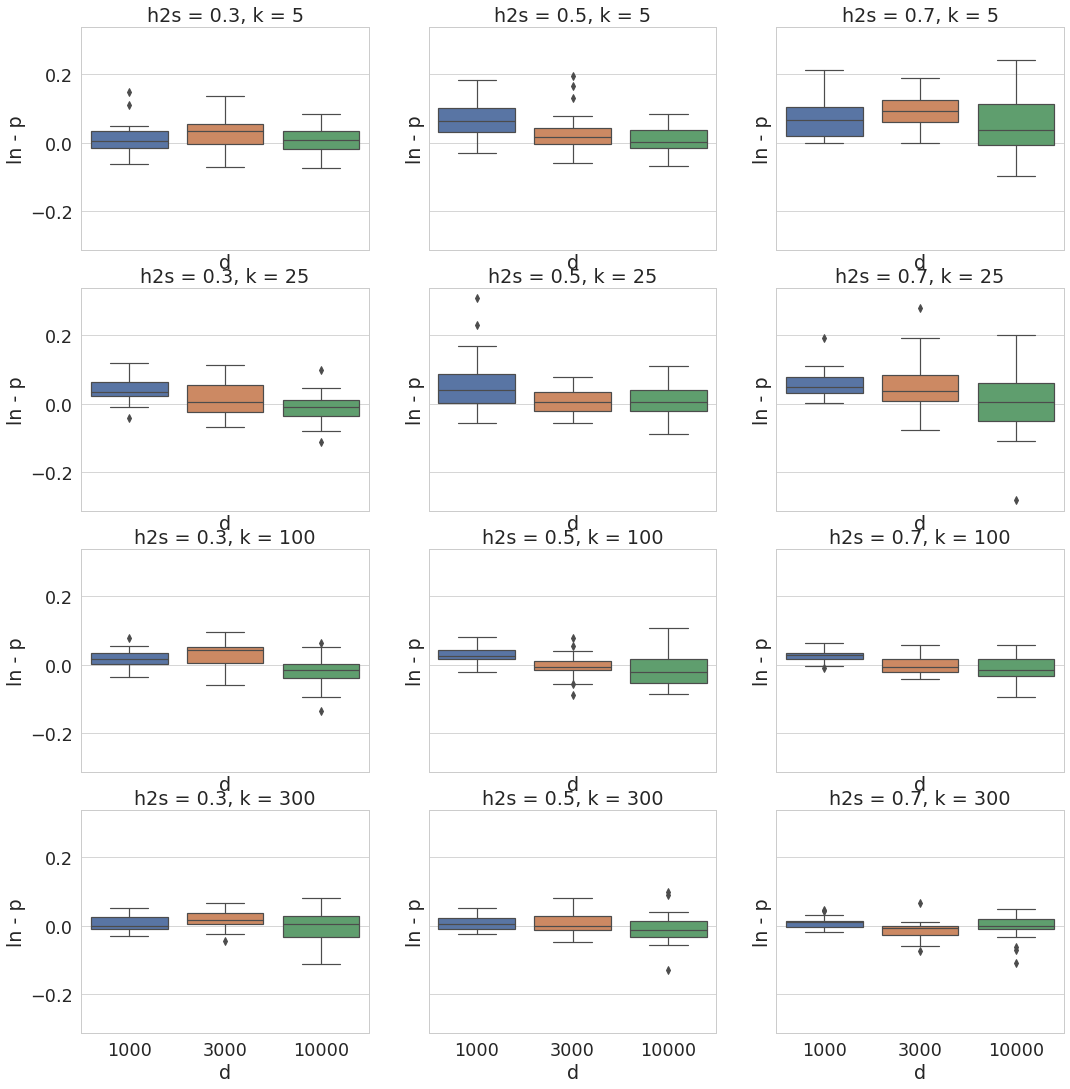

In [12]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15), squeeze=False, sharex=True, sharey=True)
plt.tight_layout()

for (k, h2s), ax in zip(product([5, 25, 100, 300], [0.3, 0.5, 0.7]), axes.ravel()):
    plt.sca(ax)
    dff = final_delta[final_delta["h2s"] == h2s][final_delta["k"] == k]
    sns.boxplot(y=dff["lr", "delta"], x=dff["d"])
    plt.ylabel("ln - p")
    ax.set_title(f"h2s = {h2s}, k = {k}")

## SVM AUC

Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox


Text(0.5, 0.98, '1k')

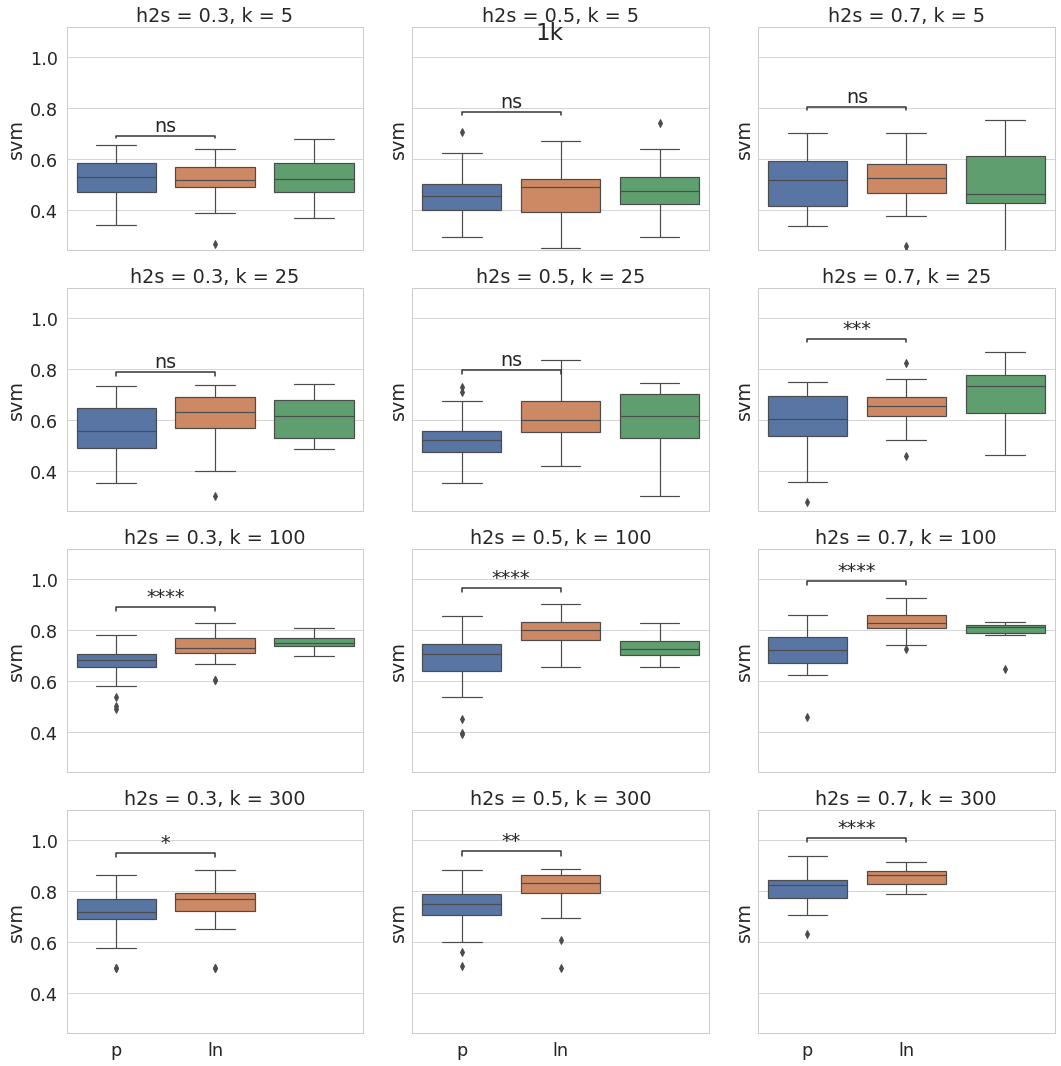

In [13]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15), squeeze=False, sharex=True, sharey=True)
plt.tight_layout()

dff = df_1k.query("method != 'ae'")
plt.tight_layout()
for (k, h2s), ax in zip(product([5, 25, 100, 300], [0.3, 0.5, 0.7]), axes.ravel()):
    plt.sca(ax)
    
    dfff = dff.query(f"k == {k} and h2s == {h2s}")
    
    sns.boxplot(x=dfff["method"], y=dfff["svm"])
    plt.xlabel("")
    
    test_results = add_stat_annotation(
        ax, x=dfff["method"], y=dfff["svm"], 
        order=["p", "ln", "hsic"],
        box_pairs=[
            ("ln", "p")
        ],
        test='Wilcoxon', text_format='star',
        loc='inside', verbose=0)
    plt.title(f"h2s = {h2s}, k = {k}")

plt.suptitle("1k")

Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox


Text(0.5, 0.98, '3k')

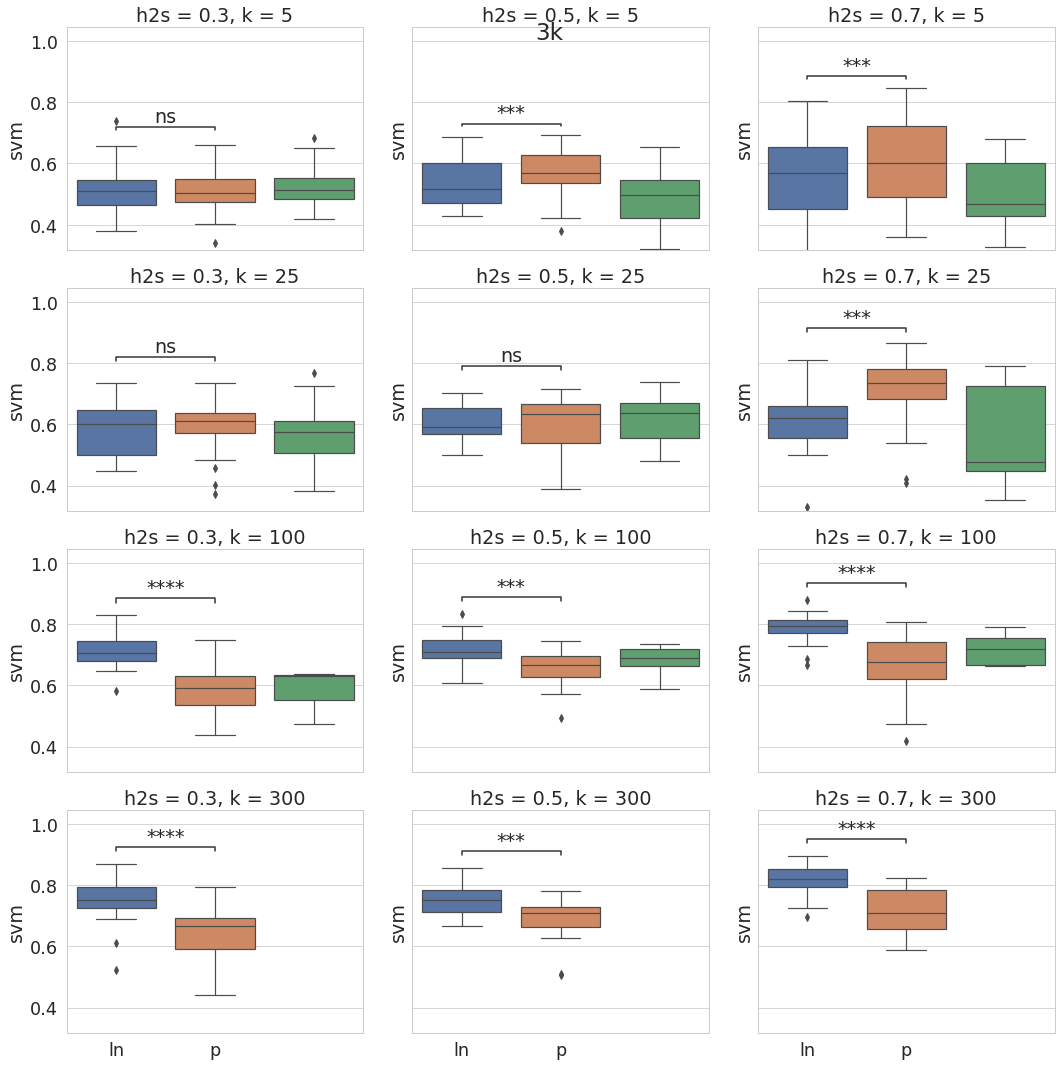

In [14]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15), squeeze=False, sharex=True, sharey=True)
plt.tight_layout()

dff = df_3k.query("method != 'ae'")
plt.tight_layout()
for (k, h2s), ax in zip(product([5, 25, 100, 300], [0.3, 0.5, 0.7]), axes.ravel()):
    plt.sca(ax)
    
    dfff = dff.query(f"k == {k} and h2s == {h2s}")
    
    sns.boxplot(x=dfff["method"], y=dfff["svm"])
    plt.xlabel("")
    
    test_results = add_stat_annotation(
        ax, x=dfff["method"], y=dfff["svm"], 
        order=["p", "ln", "hsic"],
        box_pairs=[
            ("ln", "p")
        ],
        test='Wilcoxon', text_format='star',
        loc='inside', verbose=0)
    plt.title(f"h2s = {h2s}, k = {k}")

plt.suptitle("3k")

Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox


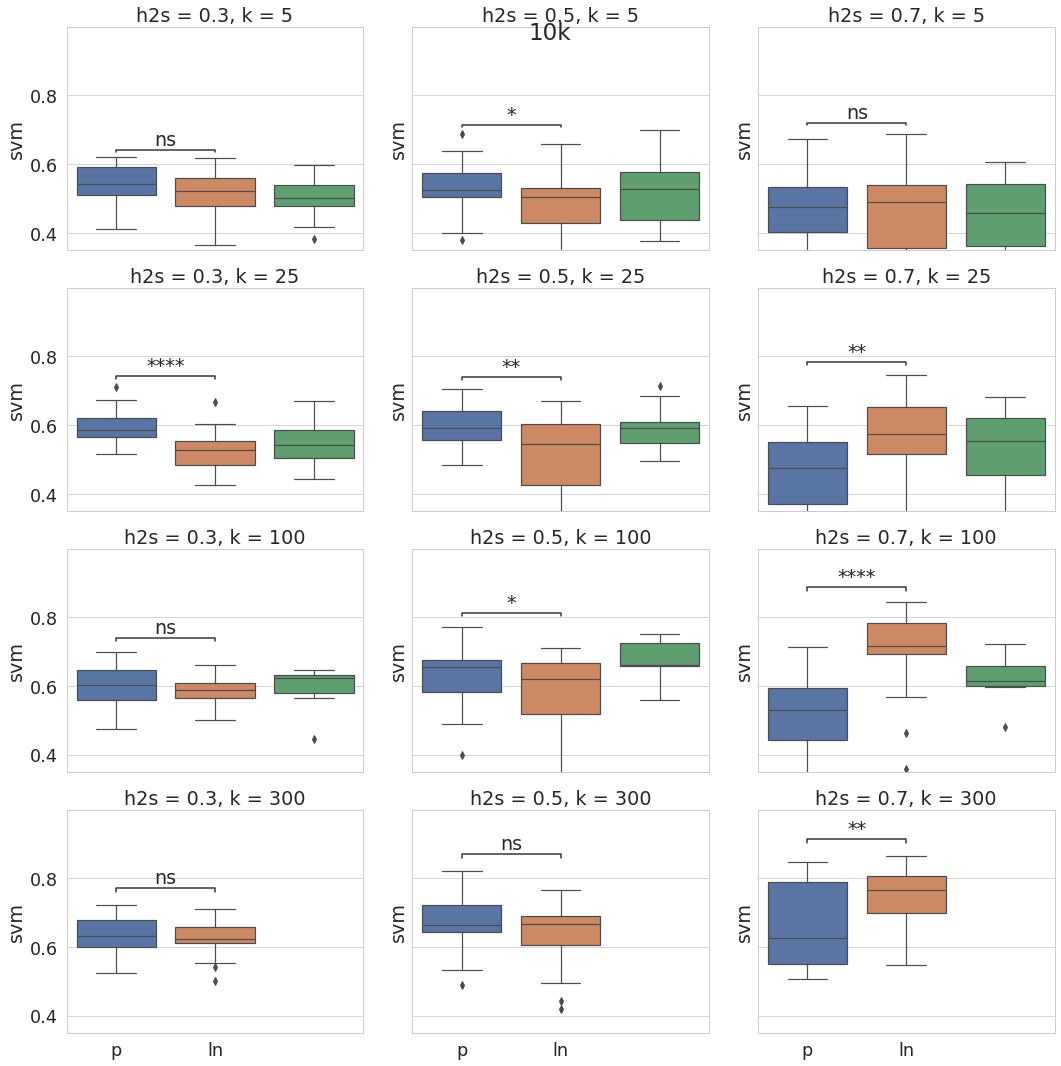

In [15]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15), squeeze=False, sharex=True, sharey=True)
plt.tight_layout()

dff = df_10k.query("method != 'ae'")
plt.tight_layout()
fig.suptitle("10k")
for (k, h2s), ax in zip(product([5, 25, 100, 300], [0.3, 0.5, 0.7]), axes.ravel()):
    plt.sca(ax)
    
    dfff = dff.query(f"k == {k} and h2s == {h2s}")
    
    sns.boxplot(x=dfff["method"], y=dfff["svm"])
    plt.xlabel("")
    
    test_results = add_stat_annotation(
        ax, x=dfff["method"], y=dfff["svm"], 
        order=["p", "ln", "hsic"],
        box_pairs=[
            ("ln", "p")
        ],
        test='Wilcoxon', text_format='star',
        loc='inside', verbose=0)
    plt.title(f"h2s = {h2s}, k = {k}")

/home/shussain/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/shussain/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/shussain/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/shussain/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/shussain/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/shussain/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/shussain/miniconda3/lib/python3.7/site-package

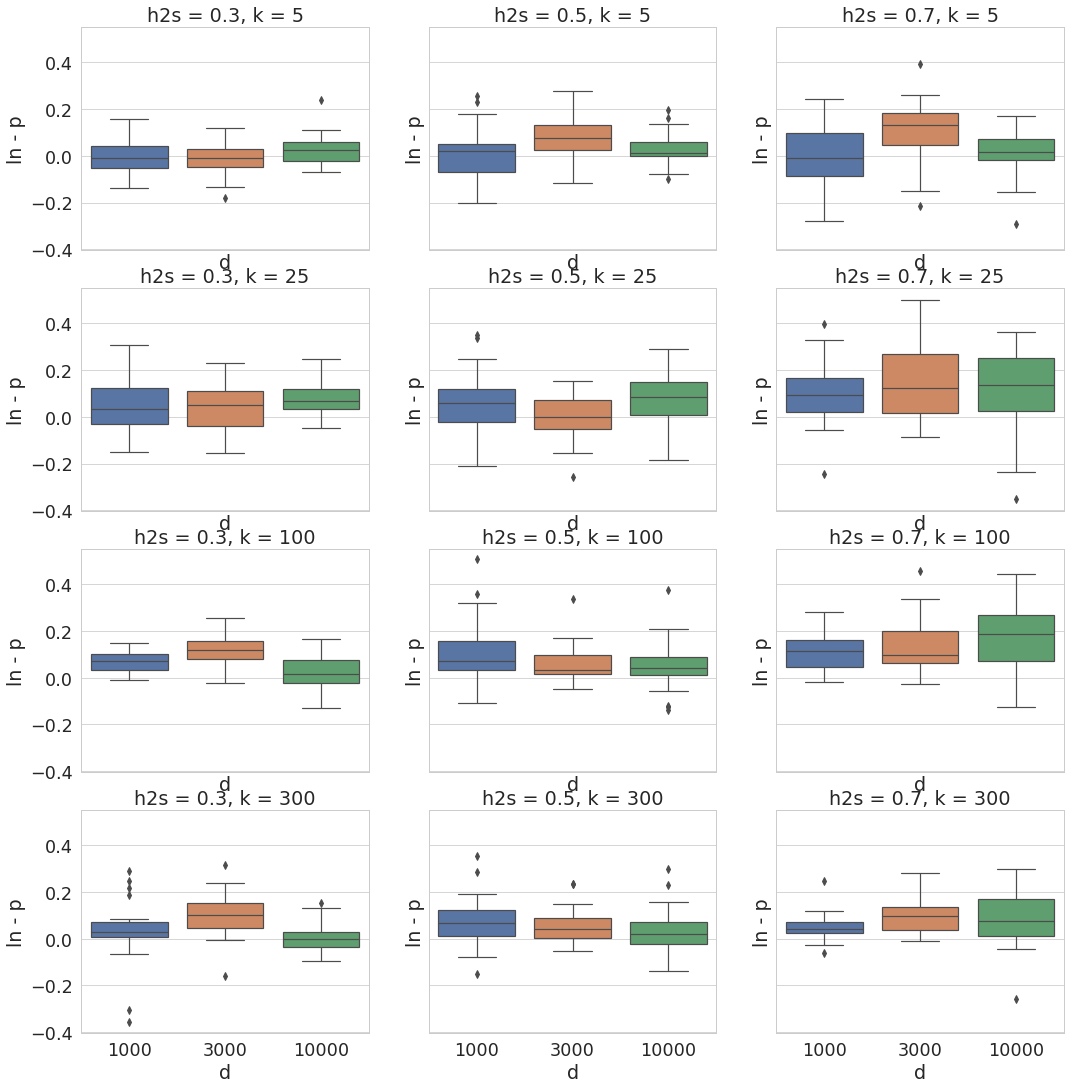

In [16]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15), squeeze=False, sharex=True, sharey=True)
plt.tight_layout()

for (k, h2s), ax in zip(product([5, 25, 100, 300], [0.3, 0.5, 0.7]), axes.ravel()):
    plt.sca(ax)
    dff = final_delta[final_delta["h2s"] == h2s][final_delta["k"] == k]
    sns.boxplot(y=dff["svm", "delta"], x=dff["d"])
    plt.ylabel("ln - p")
    ax.set_title(f"h2s = {h2s}, k = {k}")